In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Read CSV with a fallback encoding to avoid UnicodeDecodeError
try:
	csv_data = pd.read_csv("./dataset/sales_data_sample.csv", encoding='utf-8')
except UnicodeDecodeError:
	# common fallback for files produced on Windows
	csv_data = pd.read_csv("./dataset/sales_data_sample.csv", encoding='cp1252')

excel_data = pd.read_excel("./dataset/sales_data_sample.xlsx")
json_data = pd.read_json("./dataset/sales_data_sample.json")

print("CSV Data Sample:\n", csv_data.head())
print("Excel Data Sample:\n", excel_data.head())
print("JSON Data Sample:\n", json_data.head())


CSV Data Sample:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Ab

In [9]:
print("Shape:", csv_data.shape)
print("Columns:", csv_data.columns.tolist())
print(csv_data.info())
print(csv_data.describe())

# Missing values
print("\nMissing Values:\n", csv_data.isnull().sum())


Shape: (2823, 25)
Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID    

In [10]:
#data cleaning
for df in [csv_data, excel_data, json_data]:
    # Fill missing numeric values with median
    num_cols = df.select_dtypes(include=np.number).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].median())
    
    # Fill text columns with mode
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Remove duplicates
    df.drop_duplicates(inplace=True)

# Convert order date
for df in [csv_data, excel_data, json_data]:
    df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_16516\2320315595.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_16516\2320315595.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [11]:
# Convert into a Unified Format
csv_data.columns = [col.strip().upper() for col in csv_data.columns]
excel_data.columns = csv_data.columns
json_data.columns = csv_data.columns

sales_data = pd.concat([csv_data, excel_data, json_data], ignore_index=True)
sales_data.drop_duplicates(inplace=True)

print("Unified Dataset Shape:", sales_data.shape)
sales_data.head()


Unified Dataset Shape: (7876, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,Level 3,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Level 3,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Level 3,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Level 3,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,Level 3,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


In [12]:
# Derive new columns
sales_data['TOTAL_SALE'] = sales_data['QUANTITYORDERED'] * sales_data['PRICEEACH']
sales_data['MONTH'] = sales_data['ORDERDATE'].dt.month_name()
sales_data['YEAR'] = sales_data['ORDERDATE'].dt.year

# Check transformation
sales_data[['ORDERNUMBER', 'SALES', 'TOTAL_SALE', 'MONTH', 'YEAR']].head()


,ORDERNUMBER,SALES,TOTAL_SALE,MONTH,YEAR
0,10107,2871.00,2871.00,February,2003
1,10121,2765.90,2765.90,May,2003
2,10134,3884.34,3884.34,July,2003
3,10145,3746.70,3746.70,August,2003
4,10159,5205.27,4900.00,October,2003


In [13]:
#salaes analysis
total_sales = sales_data['TOTAL_SALE'].sum()
avg_order_value = sales_data['TOTAL_SALE'].mean()

print(f"💰 Total Sales: ₹{total_sales:,.2f}")
print(f"📦 Average Order Value: ₹{avg_order_value:,.2f}")


💰 Total Sales: ₹23,163,461.24
📦 Average Order Value: ₹2,941.02


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_16516\4061648624.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PRODUCTLINE', y='TOTAL_SALE', data=product_sales, palette='viridis')


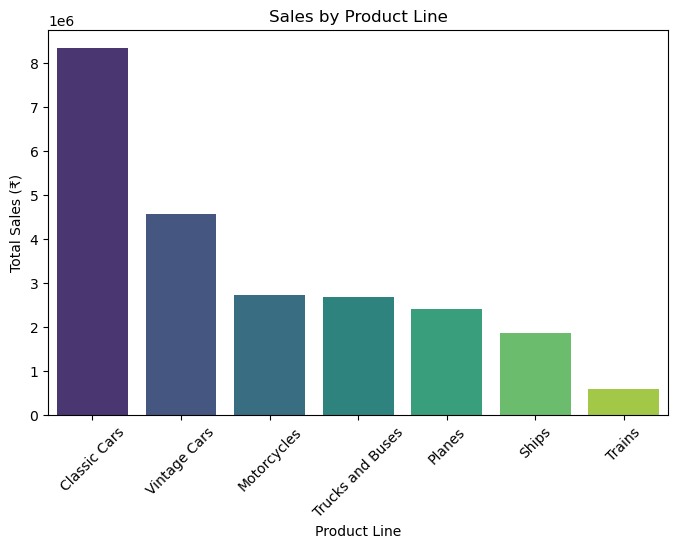

In [14]:
# b) Sales by Product Line
product_sales = sales_data.groupby('PRODUCTLINE')['TOTAL_SALE'].sum().reset_index().sort_values(by='TOTAL_SALE', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='PRODUCTLINE', y='TOTAL_SALE', data=product_sales, palette='viridis')
plt.title("Sales by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.show()


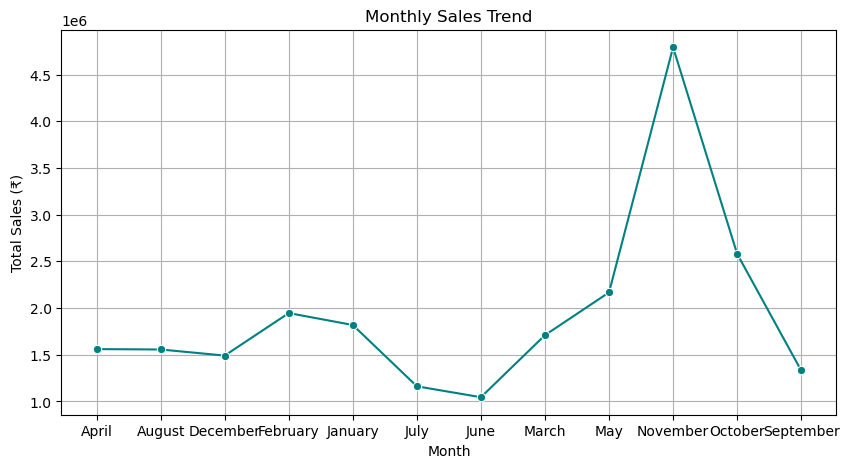

In [15]:
# c) Monthly Sales Trend
monthly_sales = sales_data.groupby('MONTH')['TOTAL_SALE'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='MONTH', y='TOTAL_SALE', data=monthly_sales, marker='o', color='teal')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.grid(True)
plt.show()


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_16516\1358225916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='TOTAL_SALE', data=region_sales, palette='coolwarm')


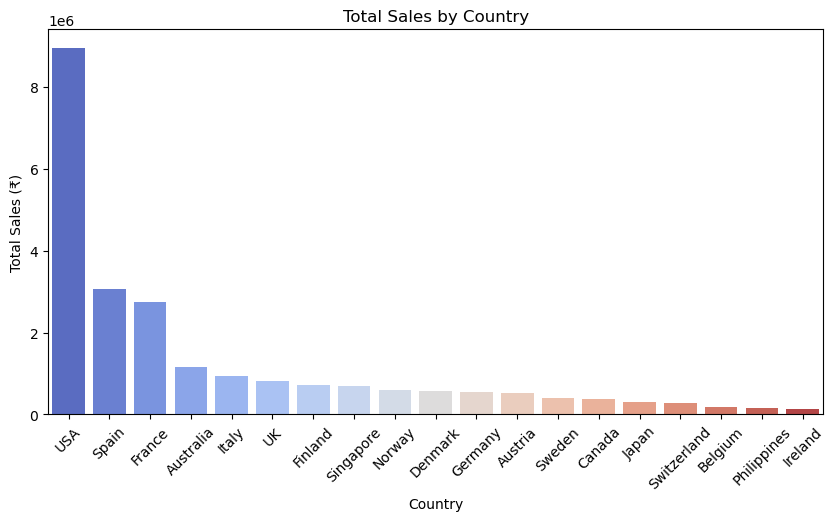

In [16]:
# d) Regional Sales Performance
if 'COUNTRY' in sales_data.columns:
    region_sales = sales_data.groupby('COUNTRY')['TOTAL_SALE'].sum().reset_index().sort_values(by='TOTAL_SALE', ascending=False)

    plt.figure(figsize=(10,5))
    sns.barplot(x='COUNTRY', y='TOTAL_SALE', data=region_sales, palette='coolwarm')
    plt.title("Total Sales by Country")
    plt.xlabel("Country")
    plt.ylabel("Total Sales (₹)")
    plt.xticks(rotation=45)
    plt.show()


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_16516\3667395425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='CUSTOMERNAME', x='TOTAL_SALE', data=top_customers, palette='crest')


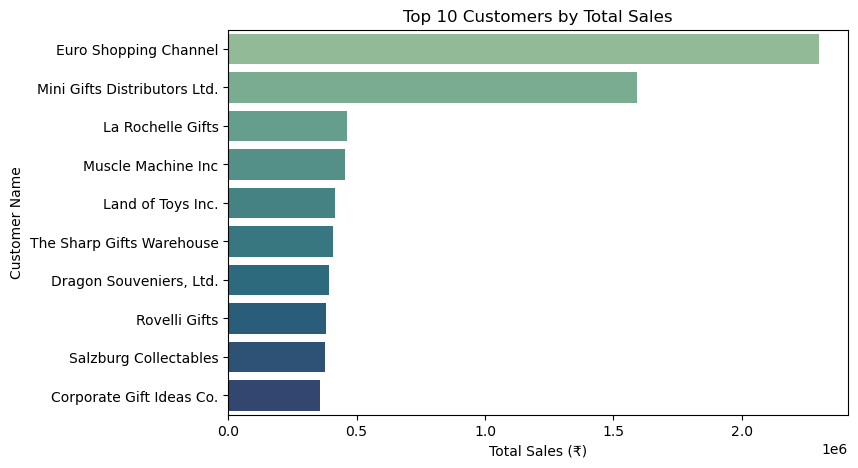

In [17]:
# e) Top 10 Customers by Sales
top_customers = sales_data.groupby('CUSTOMERNAME')['TOTAL_SALE'].sum().reset_index().sort_values(by='TOTAL_SALE', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y='CUSTOMERNAME', x='TOTAL_SALE', data=top_customers, palette='crest')
plt.title("Top 10 Customers by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Customer Name")
plt.show()


C:\Users\SHREYAS\AppData\Local\Temp\ipykernel_16516\3680769405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DEALSIZE', y='TOTAL_SALE', data=sales_data, palette='Set2')


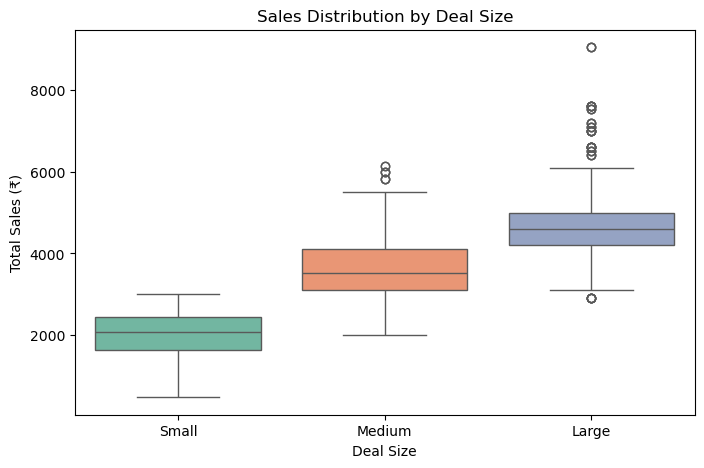

In [18]:
# f) Box Plot — Sales Distribution by Deal Size
plt.figure(figsize=(8,5))
sns.boxplot(x='DEALSIZE', y='TOTAL_SALE', data=sales_data, palette='Set2')
plt.title("Sales Distribution by Deal Size")
plt.xlabel("Deal Size")
plt.ylabel("Total Sales (₹)")
plt.show()


In [19]:
#summary
summary = sales_data.groupby('YEAR')['TOTAL_SALE'].agg(['sum', 'mean', 'max', 'min']).reset_index()
print(summary)


   YEAR          sum         mean      max     min
0  2003   8103265.74  2898.163712  5000.00  710.20
1  2004  10893413.63  2915.015689  5500.00  577.60
2  2005   4166781.87  3102.592606  9048.16  482.13


In [20]:
sales_data.to_csv("Cleaned_Sales_Data.csv", index=False)
print("✅ Clean unified dataset saved as 'Cleaned_Sales_Data.csv'")


✅ Clean unified dataset saved as 'Cleaned_Sales_Data.csv'
